<a href="https://colab.research.google.com/github/lauren-esser/better-predicting-the-stock-market-capstone/blob/master/Capstone11_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Final Project Submission:

**Student Name:** Lauren Esser

**Student Pace:** Full Time

**Scheduled Project Review Date/Time:**  

**Instructor Name:** James Irving

**Blog Post URLS:**  https://lauren-esser.github.io/how_to_use_newsapi and 

#Abstract

An Abstract section that briefly explains your problem, your methodology, and your findings, and business recommendations as a result of your findings. This section should be 1-2 paragraphs long.


#Import

In [ ]:
#set numpy random seed
import numpy as np
np.random.seed(1919)

In [ ]:
#set tensor random seed
import tensorflow as tf
tf.random.set_seed(1919)

In [ ]:
#then import other libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
import os, glob
from statsmodels.tsa.stattools import adfuller
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
from nltk import FreqDist
from nltk.collocations import *



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#connect to google drive
from google.colab import drive
drive.mount('/gdrive', force_remount = True)

Mounted at /gdrive


In [ ]:
%cd ~
%cd ..

/root
/


In [ ]:
!ls "/gdrive/My Drive/Colab Notebooks/DataSets"

archive.zip		      IVE_tickbidask.txt
chest-xray-pneumonia-jmi.zip  Megatable-2016.sql
dogs-vs-cats-sorted.zip       News_Category_Dataset_v2.json


In [ ]:
print(os.path.abspath(os.curdir))
os.listdir()

/


['sbin',
 'root',
 'opt',
 'lib',
 'dev',
 'sys',
 'var',
 'lib64',
 'usr',
 'mnt',
 'media',
 'bin',
 'tmp',
 'home',
 'srv',
 'run',
 'proc',
 'boot',
 'etc',
 'gdrive',
 'News_Category_Dataset_v2.json',
 'archive.zip',
 '.dockerenv',
 'datalab',
 'tools',
 'swift',
 'tensorflow-1.15.2',
 'content',
 'lib32']

#Obtain

Obtain Stocks Dataset:
1. Go to http://www.kibot.com/free_historical_data.aspx
2. Scroll to bottom of page and download "Tick with bid/ask data" under IVE(S&P 500 Value Index) 
3. Upload to Google drive
4. Follow below steps

In [ ]:
#import and assign txt file
source_folder = r'/gdrive/My Drive/Colab Notebooks/DataSets/'
target_folder = r'/content/'
file = glob.glob(source_folder+ 'IVE_tickbidask.txt', recursive = True)
file = file[0]
file

'/gdrive/My Drive/Colab Notebooks/DataSets/IVE_tickbidask.txt'

In [ ]:
#define and view txt file
stocks = pd.read_csv(file, header = None)
stocks.head()

0         1      2      3      4    5
0  09/28/2009  09:30:00  50.79  50.70  50.79  100
1  09/28/2009  09:30:00  50.71  50.70  50.79  638
2  09/28/2009  09:31:32  50.75  50.75  50.76  100
3  09/28/2009  09:31:32  50.75  50.75  50.76  100
4  09/28/2009  09:31:33  50.75  50.75  50.76  100

In [ ]:
#rename column headers
stocks = stocks.rename(columns={0: 'Date', 1:'Time', 2: 'Price', 3:'Bid',
                                4: 'Ask', 5:'Size'})
stocks

Date      Time   Price     Bid     Ask  Size
0        09/28/2009  09:30:00   50.79   50.70   50.79   100
1        09/28/2009  09:30:00   50.71   50.70   50.79   638
2        09/28/2009  09:31:32   50.75   50.75   50.76   100
3        09/28/2009  09:31:32   50.75   50.75   50.76   100
4        09/28/2009  09:31:33   50.75   50.75   50.76   100
...             ...       ...     ...     ...     ...   ...
8467941  11/05/2020  16:10:00  116.57  114.01  120.25     0
8467942  11/05/2020  16:25:33  116.35  114.68  118.73   900
8467943  11/05/2020  16:25:33  115.68  114.68  118.73   795
8467944  11/05/2020  18:30:00  116.57  114.54  118.40     0
8467945  11/05/2020  20:00:00  116.57  114.54  118.40     0

[8467946 rows x 6 columns]

#### News API: Can only access up to one month of news headlines for free

In [ ]:
#pip install newsapi-python

In [ ]:
# from newsapi import NewsApiClient

In [ ]:

# connect with API key
# newsapi = NewsApiClient(api_key = '')

In [ ]:
#identify news source options
# news_sources = newsapi.get_sources()
# news_sourcecs_list = []
# for sources in news_sources['sources']:
#   news_sourcecs_list.append(sources['name'])
#   print(sources['name'])

In [ ]:
# #test out newsapi.get_everything for specific date
# date = '2020-11-01'
# news_headlines_everything = newsapi.get_everything('&from = (date)', '&to = (date1)', language = 'en')
                                                
# news_titles_everything = []
# for article in news_headlines_everything['articles']:
#   news_titles_everything.append(article['title'])
#   print(article['title'])

In [ ]:
# #create empty list
# news_titles = []

# #create function
# def get_news_titles(date):
#   '''Used to get a list of 20 news titles from usatoday on date specified via newsapi.org.

#   Args: date = desired date

#   Returns: List of 20 news articles from the specified date with the date listed after

#   Example: get_news_titles('2020-11-01')'''
  
#   date = date
#   news_headlines_everything = newsapi.get_everything(from_param = (date), to = (date), language = 'en', domains = 'usatoday.com')
#   for article in news_headlines_everything['articles']:
#     news_titles.append([article['title'], date])
#     #print(article['title'])
#     #return news_titles

In [ ]:
# get_news_titles('2020-11-01')

In [ ]:
# news_titles

In [ ]:
# get_news_titles('2020-10-25')
# news_titles

In [ ]:
# len(news_titles)

In [ ]:
# # sunday_news = ['2020-01-05', '2020-01-12', '2020-01-19', '2020-01-26', '2020-02-02', 
#                '2020-02-09', '2020-02-16', '2020-02-23', '2020-03-01', '2020-03-08',
#                '2020-03-15', '2020-03-22', '2020-03-29', '2020-04-05', '2020-04-12',
#                '2020-04-19', '2020-04-26', '2020-05-03', '2020-05-10', '2020-05-17',
#                '2020-05-24', '2020-05-31', '2020-06-07', '2020-06-14', '2020-06-21',
#                '2020-06-28', '2020-07-05', '2020-07-12', '2020-07-19', '2020-07-26', 
#                '2020-08-02', '2020-08-09', '2020-08-16', '2020-08-23', '2020-08-30',
#                '2020-09-06', '2020-09-13', '2020-09-20', '2020-09-27', '2020-10-04', 
#                '2020-10-11', '2020-10-18', '2020-10-25', '2020-11-01']

In [ ]:
# for date in sunday_news:
#   new = get_news_titles(date)
#   news_titles.append(new)
# return news_titles

In [ ]:
#newsapi.get_top_headlines for today
# news_headlines = newsapi.get_top_headlines(language = 'en', country = 'us')
# news_titles = []
# for article in news_headlines['articles']:
#   news_titles.append(article['title'])
#   print(article['title'])

#### Obtain News Dataset

News Category Dataset from Kaggle:
1. Go to https://www.kaggle.com/rmisra/news-category-dataset
2. Download dataset to your computer
3. Upload dataset into your Google Drive folder
4. Follow steps below

In [ ]:
!ls "/gdrive/My Drive/Colab Notebooks/DataSets"

archive.zip		      IVE_tickbidask.txt
chest-xray-pneumonia-jmi.zip  Megatable-2016.sql
dogs-vs-cats-sorted.zip       News_Category_Dataset_v2.json


In [ ]:
print(os.path.abspath(os.curdir))
os.listdir()

/


['sbin',
 'root',
 'opt',
 'lib',
 'dev',
 'sys',
 'var',
 'lib64',
 'usr',
 'mnt',
 'media',
 'bin',
 'tmp',
 'home',
 'srv',
 'run',
 'proc',
 'boot',
 'etc',
 'gdrive',
 'News_Category_Dataset_v2.json',
 'archive.zip',
 '.dockerenv',
 'datalab',
 'tools',
 'swift',
 'tensorflow-1.15.2',
 'content',
 'lib32']

In [ ]:
source_folder = r'/gdrive/My Drive/Colab Notebooks/DataSets/'
target_folder = r'/content/'
file = glob.glob(source_folder+ 'archive.zip', recursive = True)
file = file[0]
file

'/gdrive/My Drive/Colab Notebooks/DataSets/archive.zip'

In [ ]:
#upzip data
zip_path = file
!cp '{zip_path}' .

!unzip -q archive.zip
!rm archive.zip

replace News_Category_Dataset_v2.json? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [ ]:
#open file for viewing
news = pd.read_json('/gdrive/My Drive/Colab Notebooks/DataSets/News_Category_Dataset_v2.json', lines = True)

In [ ]:
news.head(20)

category  ...       date
0           CRIME  ... 2018-05-26
1   ENTERTAINMENT  ... 2018-05-26
2   ENTERTAINMENT  ... 2018-05-26
3   ENTERTAINMENT  ... 2018-05-26
4   ENTERTAINMENT  ... 2018-05-26
5   ENTERTAINMENT  ... 2018-05-26
6   ENTERTAINMENT  ... 2018-05-26
7   ENTERTAINMENT  ... 2018-05-26
8   ENTERTAINMENT  ... 2018-05-26
9   ENTERTAINMENT  ... 2018-05-26
10  ENTERTAINMENT  ... 2018-05-26
11     WORLD NEWS  ... 2018-05-26
12         IMPACT  ... 2018-05-26
13       POLITICS  ... 2018-05-26
14       POLITICS  ... 2018-05-26
15       POLITICS  ... 2018-05-26
16       POLITICS  ... 2018-05-26
17       POLITICS  ... 2018-05-26
18       POLITICS  ... 2018-05-26
19       POLITICS  ... 2018-05-26

[20 rows x 6 columns]

#Scrub

### Scrubbing Stocks

In [ ]:
#check nulls
stocks.isna().sum()

Date     0
Time     0
Price    0
Bid      0
Ask      0
Size     0
dtype: int64

In [ ]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8467946 entries, 0 to 8467945
Data columns (total 6 columns):
 #   Column  Dtype  
---  ------  -----  
 0   Date    object 
 1   Time    object 
 2   Price   float64
 3   Bid     float64
 4   Ask     float64
 5   Size    int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 387.6+ MB


In [ ]:
#convert date to a datetime column
stocks['Date'] = pd.to_datetime(stocks['Date'])#, format = '%d/%m/%y')

In [ ]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8467946 entries, 0 to 8467945
Data columns (total 6 columns):
 #   Column  Dtype         
---  ------  -----         
 0   Date    datetime64[ns]
 1   Time    object        
 2   Price   float64       
 3   Bid     float64       
 4   Ask     float64       
 5   Size    int64         
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 387.6+ MB


In [ ]:
#set date to index
stocks.set_index('Date', inplace= True)

In [ ]:
stocks.index

DatetimeIndex(['2009-09-28', '2009-09-28', '2009-09-28', '2009-09-28',
               '2009-09-28', '2009-09-28', '2009-09-28', '2009-09-28',
               '2009-09-28', '2009-09-28',
               ...
               '2020-11-05', '2020-11-05', '2020-11-05', '2020-11-05',
               '2020-11-05', '2020-11-05', '2020-11-05', '2020-11-05',
               '2020-11-05', '2020-11-05'],
              dtype='datetime64[ns]', name='Date', length=8467946, freq=None)

In [ ]:
stocks.head()

Time  Price    Bid    Ask  Size
Date                                           
2009-09-28  09:30:00  50.79  50.70  50.79   100
2009-09-28  09:30:00  50.71  50.70  50.79   638
2009-09-28  09:31:32  50.75  50.75  50.76   100
2009-09-28  09:31:32  50.75  50.75  50.76   100
2009-09-28  09:31:33  50.75  50.75  50.76   100

### Scrubbing News

In [ ]:
news.head()

category  ...       date
0          CRIME  ... 2018-05-26
1  ENTERTAINMENT  ... 2018-05-26
2  ENTERTAINMENT  ... 2018-05-26
3  ENTERTAINMENT  ... 2018-05-26
4  ENTERTAINMENT  ... 2018-05-26

[5 rows x 6 columns]

In [ ]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200853 entries, 0 to 200852
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   category           200853 non-null  object        
 1   headline           200853 non-null  object        
 2   authors            200853 non-null  object        
 3   link               200853 non-null  object        
 4   short_description  200853 non-null  object        
 5   date               200853 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(5)
memory usage: 9.2+ MB


In [ ]:
news.nunique()

category                 41
headline             199344
authors               27993
link                 200812
short_description    178353
date                   2309
dtype: int64

In [ ]:
#check diff categories
news.category.value_counts()

POLITICS          32739
WELLNESS          17827
ENTERTAINMENT     16058
TRAVEL             9887
STYLE & BEAUTY     9649
PARENTING          8677
HEALTHY LIVING     6694
QUEER VOICES       6314
FOOD & DRINK       6226
BUSINESS           5937
COMEDY             5175
SPORTS             4884
BLACK VOICES       4528
HOME & LIVING      4195
PARENTS            3955
THE WORLDPOST      3664
WEDDINGS           3651
WOMEN              3490
IMPACT             3459
DIVORCE            3426
CRIME              3405
MEDIA              2815
WEIRD NEWS         2670
GREEN              2622
WORLDPOST          2579
RELIGION           2556
STYLE              2254
SCIENCE            2178
WORLD NEWS         2177
TASTE              2096
TECH               2082
MONEY              1707
ARTS               1509
FIFTY              1401
GOOD NEWS          1398
ARTS & CULTURE     1339
ENVIRONMENT        1323
COLLEGE            1144
LATINO VOICES      1129
CULTURE & ARTS     1030
EDUCATION          1004
Name: category, 

In [ ]:
#end date
news.date.max()

Timestamp('2018-05-26 00:00:00')

In [ ]:
#start date
news.date.min()

Timestamp('2012-01-28 00:00:00')

In [ ]:
#set index to date
news.set_index('date', inplace= True)

In [ ]:
news.head(20)

category  ...                                  short_description
date                       ...                                                   
2018-05-26          CRIME  ...  She left her husband. He killed their children...
2018-05-26  ENTERTAINMENT  ...                           Of course it has a song.
2018-05-26  ENTERTAINMENT  ...  The actor and his longtime girlfriend Anna Ebe...
2018-05-26  ENTERTAINMENT  ...  The actor gives Dems an ass-kicking for not fi...
2018-05-26  ENTERTAINMENT  ...  The "Dietland" actress said using the bags is ...
2018-05-26  ENTERTAINMENT  ...  "It is not right to equate horrific incidents ...
2018-05-26  ENTERTAINMENT  ...                            It's catchy, all right.
2018-05-26  ENTERTAINMENT  ...     There's a great mini-series joining this week.
2018-05-26  ENTERTAINMENT  ...  Myer's kids may be pushing for a new "Powers" ...
2018-05-26  ENTERTAINMENT  ...  You're getting a recent Academy Award-winning ...
2018-05-26  ENTERTAINMENT  ...  The pop star also wore a "Santa Fe Strong" shi...
2018-05-26     WORLD NEWS  ...  The two met to pave the way for a summit betwe...
2018-05-26         IMPACT  ...   The revolution is coming to rural New Brunswick.
2018-05-26       POLITICS  ...  Last month a Health and Human Services officia...
2018-05-26       POLITICS  ...  The wiretaps feature conversations between Ale...
2018-05-26       POLITICS  ...  But don't count on Robert Mueller to nail him,...
2018-05-26       POLITICS  ...                             Just a peeping minute.
2018-05-26       POLITICS  ...  Irish women will no longer have to travel to t...
2018-05-26       POLITICS  ...  The interior secretary attempts damage control...
2018-05-26       POLITICS  ...  And there are four times as many male as femal...

[20 rows x 5 columns]

In [ ]:
# import nltk
# nltk.download('punkt')
# nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# from nltk.tokenize import word_tokenize
# from nltk.corpus import stopwords
# import string

In [ ]:
#create stopwords list
stopwords = stopwords.words('english')
stopwords += list(string.punctuation)

In [124]:
#identify patterns to exclude
pattern = "([a-zA-Z]+(?:'[a-z]+)?)"

#create empty list
news_tokens = []

#iterate through headlines
for headline in news.headline:
  tokens = nltk.regexp_tokenize(headline, pattern)
  stopped_token = [w.lower() for w in tokens if w.lower() not in stopwords]
  stopped_token = " ".join(stopped_token)
  news_tokens.append(stopped_token)

In [157]:
news_tokens[:200]

"mass shootings texas last week tv smith joins diplo nicky jam world cup's official song hugh grant marries first time age jim carrey blasts castrato adam schiff democrats new artwork julianna margulie"

In [126]:
#join into one string
news_tokens = " ".join(news_tokens)
news_tokens

"mass shootings texas last week tv smith joins diplo nicky jam world cup's official song hugh grant marries first time age jim carrey blasts castrato adam schiff democrats new artwork julianna margulies uses donald trump poop bags pick dog morgan freeman devastated sexual harassment claims could undermine legacy donald trump lovin new mcdonald's jingle tonight show bit watch amazon prime new week mike myers reveals he'd like fourth austin powers film watch hulu new week justin timberlake visits texas school shooting victims south korean president meets north korea's kim jong un talk trump summit way life risk remote oyster growing region called robots trump's crackdown immigrant parents puts kids already strained system trump's son concerned fbi obtained wiretaps putin ally met trump jr edward snowden there's one trump loves vladimir putin booyah obama photographer hilariously trolls trump's spy claim ireland votes repeal abortion amendment landslide referendum ryan zinke looks reel ba

In [127]:
#tokenize final set
final_tokenize = word_tokenize(news_tokens)
final_tokenize[:50]

['mass',
 'shootings',
 'texas',
 'last',
 'week',
 'tv',
 'smith',
 'joins',
 'diplo',
 'nicky',
 'jam',
 'world',
 'cup',
 "'s",
 'official',
 'song',
 'hugh',
 'grant',
 'marries',
 'first',
 'time',
 'age',
 'jim',
 'carrey',
 'blasts',
 'castrato',
 'adam',
 'schiff',
 'democrats',
 'new',
 'artwork',
 'julianna',
 'margulies',
 'uses',
 'donald',
 'trump',
 'poop',
 'bags',
 'pick',
 'dog',
 'morgan',
 'freeman',
 'devastated',
 'sexual',
 'harassment',
 'claims',
 'could',
 'undermine',
 'legacy',
 'donald']

In [144]:
#remove 's from list
final_tokenize = list(filter(lambda x: x != ["'s", "u"], final_tokenize))

In [141]:
#final_tokenize = list(filter(lambda x: x != "u", final_tokenize))

In [145]:
# from nltk import FreqDist


In [146]:
#identify top 50 most freq words
freqdist = FreqDist(final_tokenize)
most_common = freqdist.most_common(50)
most_common

[('trump', 12996),
 ('photos', 10342),
 ('new', 8574),
 ('video', 5849),
 ('donald', 4607),
 ('day', 4568),
 ('best', 3806),
 ('says', 3738),
 ('women', 3390),
 ('world', 3349),
 ('make', 3282),
 ('year', 3251),
 ('one', 3190),
 ('life', 3024),
 ('get', 2951),
 ('people', 2904),
 ('first', 2746),
 ('like', 2720),
 ('time', 2695),
 ('week', 2672),
 ('kids', 2646),
 ('obama', 2560),
 ('love', 2494),
 ('could', 2453),
 ('health', 2337),
 ('ways', 2324),
 ('man', 2317),
 ('clinton', 2164),
 ('things', 2156),
 ('america', 2151),
 ('black', 2136),
 ('house', 2129),
 ('know', 2110),
 ('home', 2079),
 ('need', 2071),
 ('photo', 2038),
 ('may', 2035),
 ('back', 2016),
 ('wedding', 2000),
 ('us', 1986),
 ('gop', 1943),
 ('white', 1929),
 ('gay', 1873),
 ('show', 1872),
 ('watch', 1826),
 ('help', 1812),
 ('top', 1763),
 ('way', 1755),
 ('study', 1707),
 ('old', 1703)]

In [147]:
#normlized word frequency of top 50
total_word_count = sum(freqdist.values())
most_common = freqdist.most_common(50)
print('Word\t\t\tNormalized Frequency')
for word in most_common:
  normalized_frequency = word[1] / total_word_count
  print('{}\t\t\t{:.4}'.format(word[0], normalized_frequency))

Word			Normalized Frequency
trump			0.009805
photos			0.007802
new			0.006469
video			0.004413
donald			0.003476
day			0.003446
best			0.002871
says			0.00282
women			0.002558
world			0.002527
make			0.002476
year			0.002453
one			0.002407
life			0.002281
get			0.002226
people			0.002191
first			0.002072
like			0.002052
time			0.002033
week			0.002016
kids			0.001996
obama			0.001931
love			0.001882
could			0.001851
health			0.001763
ways			0.001753
man			0.001748
clinton			0.001633
things			0.001627
america			0.001623
black			0.001611
house			0.001606
know			0.001592
home			0.001568
need			0.001562
photo			0.001538
may			0.001535
back			0.001521
wedding			0.001509
us			0.001498
gop			0.001466
white			0.001455
gay			0.001413
show			0.001412
watch			0.001378
help			0.001367
top			0.00133
way			0.001324
study			0.001288
old			0.001285


In [151]:
#from nltk.collocations import *

In [152]:
#create bigram to show word association
bigram_measures = nltk.collocations.BigramAssocMeasures()
news_finder = BigramCollocationFinder.from_words(final_tokenize)
news_scored = news_finder.score_ngrams(bigram_measures.raw_freq)
news_scored[:50]

[(('donald', 'trump'), 0.003394211356990461),
 (('hillary', 'clinton'), 0.0010795991224390642),
 (('new', 'york'), 0.0009860489538978735),
 (('year', 'old'), 0.0008072474220893072),
 (('ca', "n't"), 0.0007325581746249694),
 (('white', 'house'), 0.0006548511797883352),
 (('i', "'m"), 0.000539422342797995),
 (('bernie', 'sanders'), 0.0005333868480534021),
 (('health', 'care'), 0.0005122626164473268),
 (('supreme', 'court'), 0.0005122626164473268),
 (('climate', 'change'), 0.0004835940164105102),
 (('new', 'year'), 0.00041192251631846894),
 (('need', 'know'), 0.0003847627899678006),
 (('fashion', 'week'), 0.00034930425834331705),
 (('super', 'bowl'), 0.00033723326885413117),
 (('study', 'finds'), 0.0003221445319926488),
 (('morning', 'email'), 0.0003168634740911299),
 (('kim', 'kardashian'), 0.0003055469214450181),
 (('taylor', 'swift'), 0.00030102030038657346),
 (('around', 'world'), 0.0002972481161712028),
 (('north', 'korea'), 0.00029272149511275816),
 (('ted', 'cruz'), 0.0002844226898

In [156]:
#create mutual information scores
news_pmi_finder = BigramCollocationFinder.from_words(final_tokenize)
news_pmi_finder.apply_freq_filter(5)
news_pmi_scored = news_pmi_finder.score_ngrams(bigram_measures.pmi)
news_pmi_scored[:50]

[(('agyness', 'deyn'), 18.016168437289927),
 (('ajit', 'pai'), 18.016168437289927),
 (('anton', 'yelchin'), 18.016168437289927),
 (('cookwithanisa', 'recipeoftheday'), 18.016168437289927),
 (('danai', 'gurira'), 18.016168437289927),
 (('diffused', 'congruence'), 18.016168437289927),
 (('gabourey', 'sidibe'), 18.016168437289927),
 (('gonz', 'lez'), 18.016168437289927),
 (('guant', 'namo'), 18.016168437289927),
 (('itty', 'bitty'), 18.016168437289927),
 (('jahlil', 'okafor'), 18.016168437289927),
 (('kelsea', 'ballerini'), 18.016168437289927),
 (('kiernan', 'shipka'), 18.016168437289927),
 (('ku', 'klux'), 18.016168437289927),
 (('lyne', 'carrington'), 18.016168437289927),
 (('magna', 'carta'), 18.016168437289927),
 (('mazel', 'tov'), 18.016168437289927),
 (('suki', 'waterhouse'), 18.016168437289927),
 (('taran', 'killam'), 18.016168437289927),
 (('tulsi', 'gabbard'), 18.016168437289927),
 (('yetta', 'kurland'), 18.016168437289927),
 (('cinque', 'terre'), 17.75313403145613),
 (('hasan', 

#Explore

### Stocks Exploration

In order to make sure we are looking at the same time frame for both stocks and news articles, I will slice and save the correct dates for stocks to correspond to the news articles: 2012-01-28 to 2018-05-26.


In [ ]:
#slice correct dates
stocks_news = stocks['2012-01-28': '2018-05-26']
stocks_news.head()

Time  Price    Bid    Ask  Size
Date                                           
2012-01-30  09:08:30  61.00  60.16  60.61  2119
2012-01-30  09:30:00  60.37  60.37  60.45   159
2012-01-30  09:30:00  60.38  60.38  60.43   100
2012-01-30  09:30:06  60.36  60.31  60.42   400
2012-01-30  09:30:17  60.30  60.29  60.39   150

I want to look at weekly mean of stocks for comparison during my Exploration.

In [ ]:
#downsampling to weekly price if needed
price_weekly = stocks_news['Price'].resample('W')
weekly_mean = price_weekly.mean()
weekly_mean.head()

Date
2012-02-05    61.231669
2012-02-12    62.488521
2012-02-19    62.603400
2012-02-26    63.227857
2012-03-04    63.464155
Freq: W-SUN, Name: Price, dtype: float64

###### Line Plot

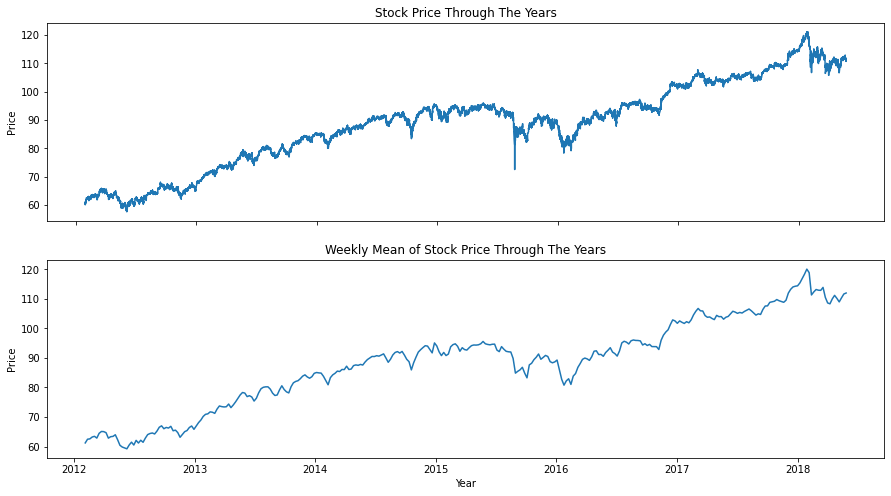

In [ ]:
#line plot of stocks price over the years
fig, (ax, ax1) = plt.subplots(2, figsize = (15, 8))
ax.plot(stocks_news['Price'])
ax.set_title('Stock Price Through The Years')
ax.set_ylabel('Price')
ax.set_xlabel('Year')

#weekly lineplot 
ax1.plot(weekly_mean)
ax1.set_title('Weekly Mean of Stock Price Through The Years')
ax1.set_ylabel('Price')
ax1.set_xlabel('Year')

#label outer to see 2nd title
ax.label_outer()

---

###### Dot Plot

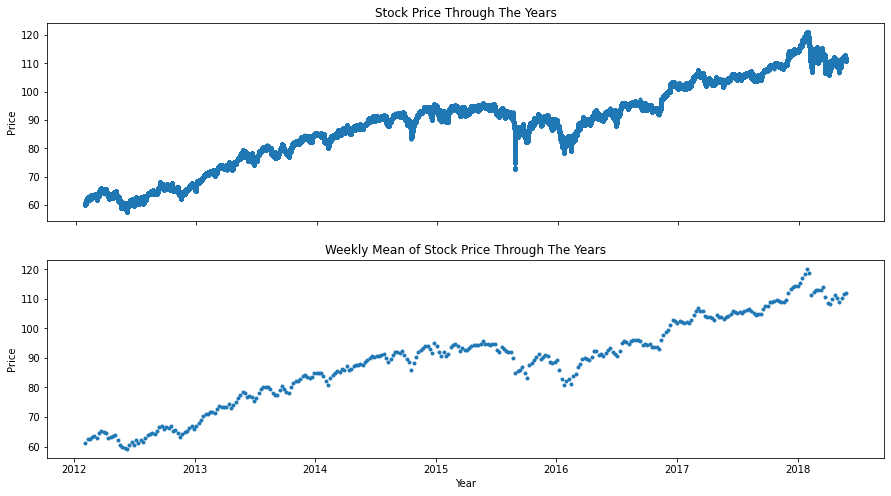

In [ ]:
#dot plot of stocks price over the years
fig, (ax, ax1) = plt.subplots(2, figsize = (15, 8))
ax.plot(stocks_news['Price'], '.')
ax.set_title('Stock Price Through The Years')
ax.set_ylabel('Price')
ax.set_xlabel('Year')

#weekly dot plot 
ax1.plot(weekly_mean, '.')
ax1.set_title('Weekly Mean of Stock Price Through The Years')
ax1.set_ylabel('Price')
ax1.set_xlabel('Year')

#label outer to see 2nd title
ax.label_outer()

---

###### Rolling Statistics

In [ ]:
#identify rolling mean and rolling standard deviation
roll_mean = stocks_news['Price'].rolling(window = 8, center = False).mean()
roll_std = stocks_news['Price'].rolling(window = 8, center = False).std()

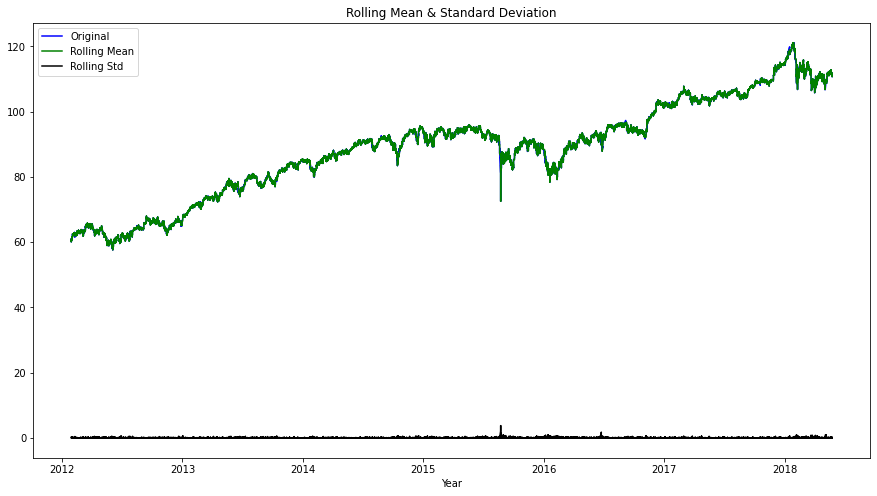

In [158]:
#visualize rolling mean, rolling std, and original
fig = plt.figure(figsize = (15, 8))
plt.plot(stocks_news['Price'], color = 'blue', label = 'Original')
plt.plot(roll_mean, color = 'green', label = 'Rolling Mean')
plt.plot(roll_std, color = 'black', label = 'Rolling Std')
plt.legend()
plt.title('Rolling Mean & Standard Deviation')
plt.xlabel('Year')
plt.show()

---

###### The Dickey-Fuller Test

In [ ]:
dftest = adfuller(weekly_mean)

dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic', 'p-value', '#Lags Used',
                                           'Number of Observations Used'])
for key, value in dftest[4].items():
  dfoutput['Critical Values (%s)' %key] = value
print(dftest)

(-1.013652453608182, 0.7482523707955607, 2, 327, {'1%': -3.45050711373316, '5%': -2.8704195794076743, '10%': -2.571500856923753}, 998.5184293821985)


In [ ]:
print('Results of Dicky-Fuller test: \n')

print(dfoutput)

Results of Dicky-Fuller test: 

Test Statistic                  -1.013652
p-value                          0.748252
#Lags Used                       2.000000
Number of Observations Used    327.000000
Critical Values (1%)            -3.450507
Critical Values (5%)            -2.870420
Critical Values (10%)           -2.571501
dtype: float64


**Summary:**
- Not a stationary series
- Linear upward trend
- Big drop near the end of 2015.


---

###### Grouping and Visualizing Time Series

In [ ]:
stocks_news.head()

Time  Price    Bid    Ask  Size
Date                                           
2012-01-30  09:08:30  61.00  60.16  60.61  2119
2012-01-30  09:30:00  60.37  60.37  60.45   159
2012-01-30  09:30:00  60.38  60.38  60.43   100
2012-01-30  09:30:06  60.36  60.31  60.42   400
2012-01-30  09:30:17  60.30  60.29  60.39   150

James suggestion in class: kinda confused, may need to wait for one on one.

In [159]:
#group values annually
year_groups = stocks_news.groupby(pd.Grouper(freq = 'A'))

In [ ]:
# #add year column for ease of use
# stocks_news['year'] = stocks_news.index.to_series().apply(lambda x: x.year)

# #check column
# stocks_news.head()

In [ ]:
# #create new dataframe to store yearly values
# stocks_annual = pd.DataFrame()

# for yr, group in year_groups:
#   stocks_annual[yr.year] = group.values.ravel()

# #plot yearly subplots
# stocks_annual.plot(figsize=(15, 8), subplots = True, legend = True);
# plt.show()

In [ ]:
# year_groups.keys()

In [ ]:
#plot all years on same graph
# stocks_annual.plot(figsize - (15,8), subplots = False, legend = True)
# plt.show()

###### Histograms

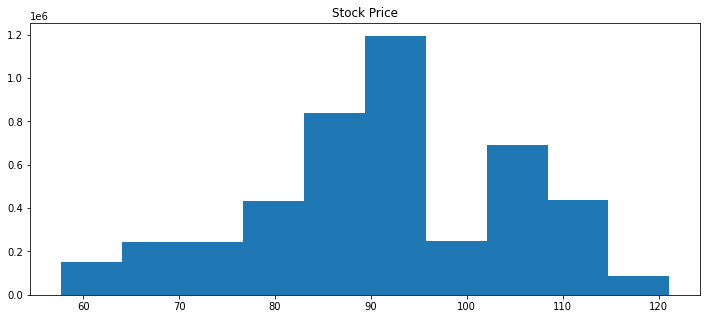

In [ ]:
#build histogram to check distribution
fig, ax = plt.subplots(figsize = (12, 5))
ax.hist(stocks_news['Price'])
ax.set_title('Stock Price')
plt.show()

###### Density Plot

Text(0.5, 1.0, 'Density Plot of Stock Price')

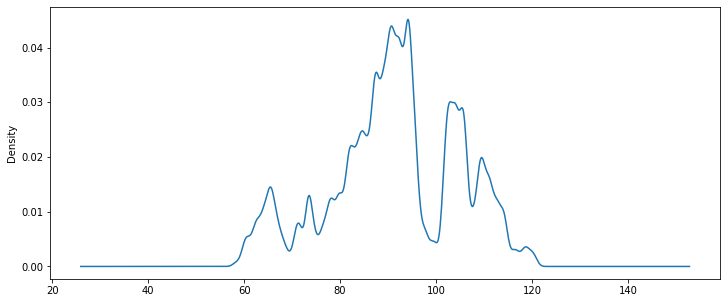

In [ ]:
#build density plot to check distribution
stocks_news['Price'].plot(kind = 'kde', figsize = (12, 5));
ax.set_title('Density Plot of Stock Price')

###### Time Series Box and Whisker Plots by Year

In [ ]:
#build box and whiskers plot by year
#stocks_annual.boxplot(figsize = (12, 5));

###### Time Series Heat Map

In [ ]:
#year_matrix = stocks_annual.T
#plt.matshow(year_matrix, interpolation = None, aspect = 'auto');

#### Eliminating the trend

##### Square Root Transform

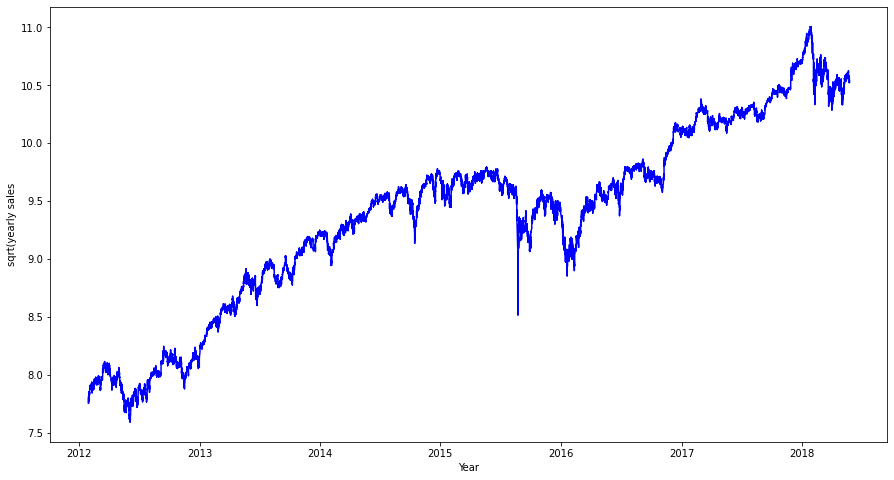

In [ ]:
data = pd.Series(np.sqrt(stocks_news['Price']))
fig = plt.figure(figsize = (15, 8))
plt.plot(data, color = 'blue')
plt.xlabel('Year')
plt.ylabel('sqrt(yearly sales')
plt.show()

##### Log Transformation

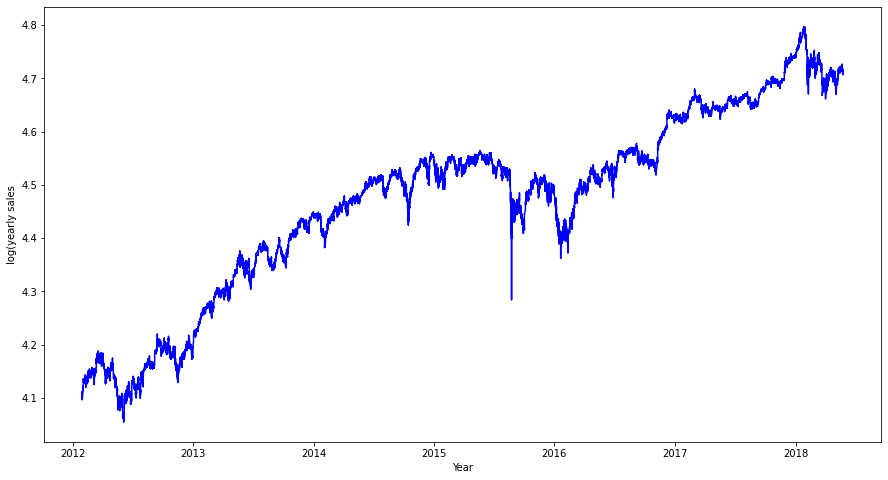

In [ ]:
data = pd.Series(np.log(stocks_news['Price']))
fig = plt.figure(figsize = (15, 8))
plt.plot(data, color = 'blue')
plt.xlabel('Year')
plt.ylabel('log(yearly sales')
plt.show()

##### Differencing


In [ ]:
data_diff = data.diff(periods = 1)
data_diff.head()

Date
2012-01-30         NaN
2012-01-30   -0.010382
2012-01-30    0.000166
2012-01-30   -0.000331
2012-01-30   -0.000995
Name: Price, dtype: float64

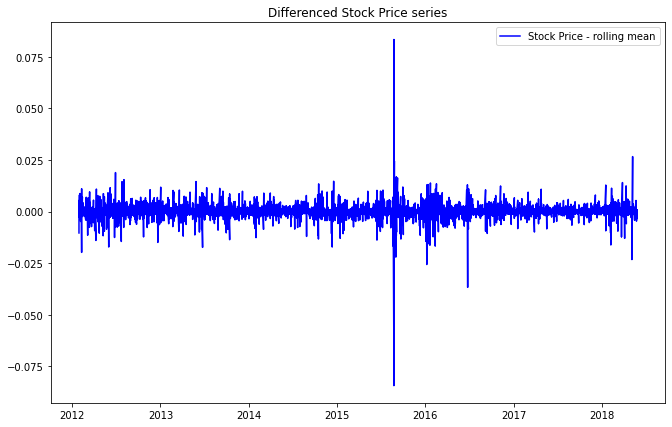

In [ ]:
fig = plt.figure(figsize=(11,7))
plt.plot(data_diff, color='blue',label='Stock Price - rolling mean')
plt.legend(loc='best')
plt.title('Differenced Stock Price series')
plt.show(block=False)

In [ ]:
data_diff = data.diff().dropna()
data_diff.head()

Date
2012-01-30   -0.010382
2012-01-30    0.000166
2012-01-30   -0.000331
2012-01-30   -0.000995
2012-01-30   -0.000498
Name: Price, dtype: float64

In [ ]:
# data_diff = data_diff.groupby(pd.Grouper(freq = 'A'))
# data_diff.head()

### News Exploration

<Figure size 1080x576 with 0 Axes>

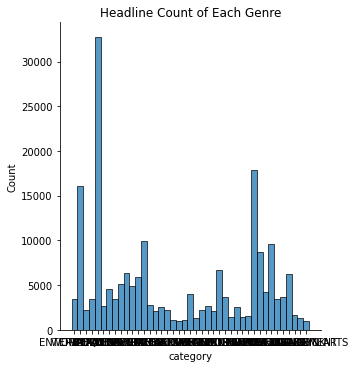

In [160]:
fig = plt.figure(figsize = (15, 8))
sns.displot(news.category)
plt.title('Headline Count of Each Genre');

In [161]:
news['year'] = news.index.to_series().apply(lambda x: x.year)

In [162]:
news.head()

category  ...  year
date                       ...      
2018-05-26          CRIME  ...  2018
2018-05-26  ENTERTAINMENT  ...  2018
2018-05-26  ENTERTAINMENT  ...  2018
2018-05-26  ENTERTAINMENT  ...  2018
2018-05-26  ENTERTAINMENT  ...  2018

[5 rows x 6 columns]

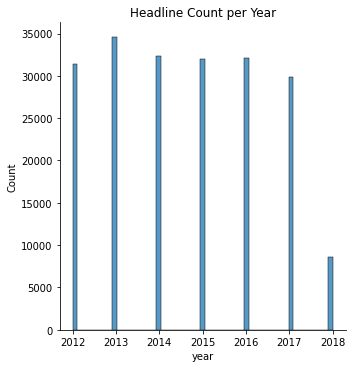

In [163]:
sns.displot(news.year)
plt.title('Headline Count per Year');

#Model

#### Stocks Basic Time Series Model

##### Random Walk Model
- no specified mean or variance
- a strong dependence over time

In [164]:
#series with the specified dates
work = pd.date_range('2012-01-28', '2018-05-26', freq = 'D')

#white noise error 
error = np.random.normal(0, 10, len(work))

#random walk
def random_walk(start, error):
  Y_0 = start
  cum_error = np.cumsum(error)
  Y = cum_error + Y_0
  return Y

#value of share on first date
share_value = random_walk(61, error)

shares_series = pd.Series(share_value, index = work)

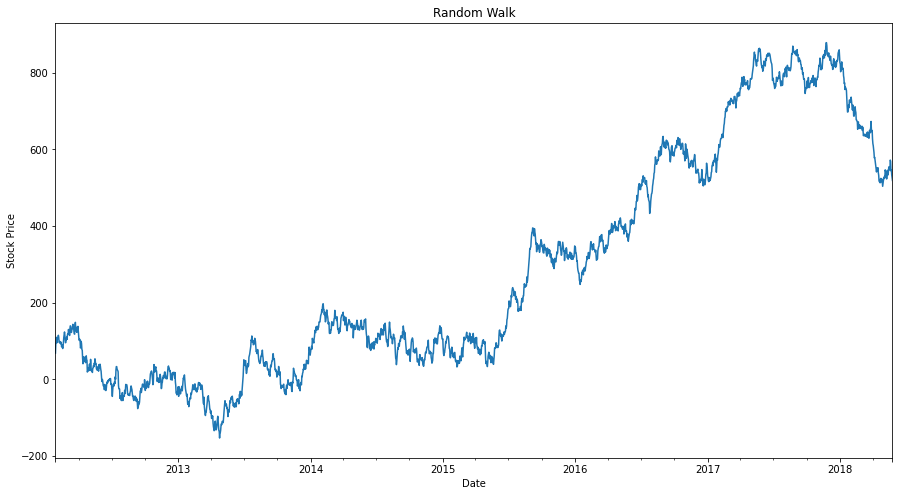

In [165]:
ax = shares_series.plot(figsize = (15, 8))
ax.set_xlabel('Date')
ax.set_ylabel('Stock Price')
ax.set_title('Random Walk')
plt.show()

##### Random Walk with a Drift

In [166]:
#series with the specified dates
work = pd.date_range('2012-01-28', '2018-05-26', freq = 'D')

#white noise error 
error = np.random.normal(0, 10, len(work))

#random walk
def random_walk(start, error):
  Y_0 = start
  #add drift of 8
  cum_error = np.cumsum(error + 8)
  Y = cum_error + Y_0
  return Y

#value of share on first date
share_value_drift = random_walk(61, error)

shares_series_diff = pd.Series(share_value_drift, index = work)

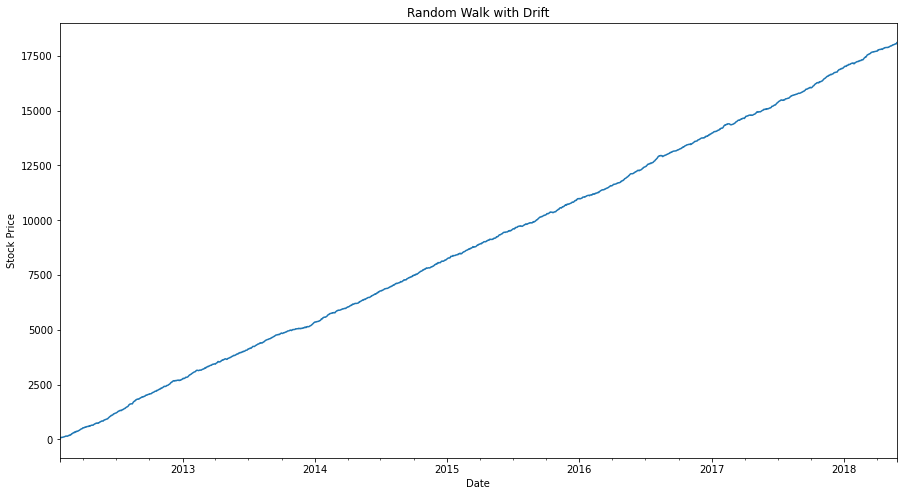

In [167]:
ax = shares_series_diff.plot(figsize = (15, 8))
ax.set_xlabel('Date')
ax.set_ylabel('Stock Price')
ax.set_title('Random Walk with Drift')
plt.show()

##### Differencing in a Random Walk Model

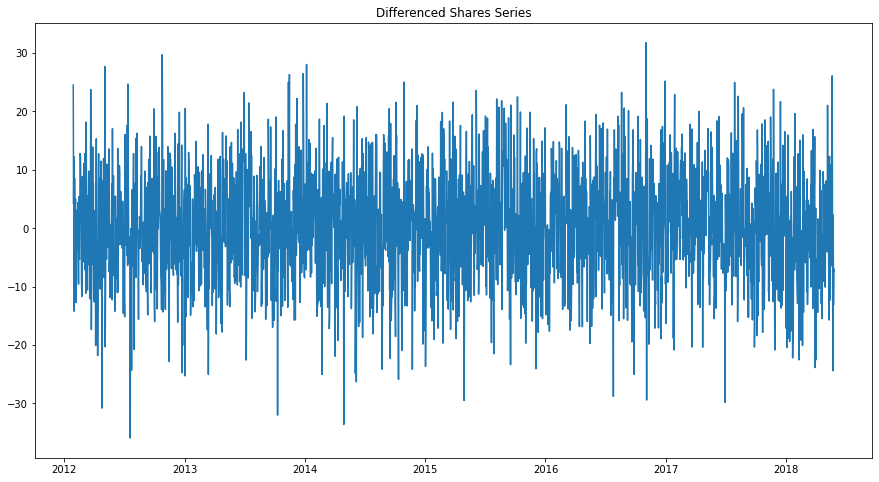

In [168]:
#no drift
shares_diff = shares_series.diff(periods = 1)

fig = plt.figure(figsize = (15, 8))
plt.plot(shares_diff)
plt.title('Differenced Shares Series')
plt.show()

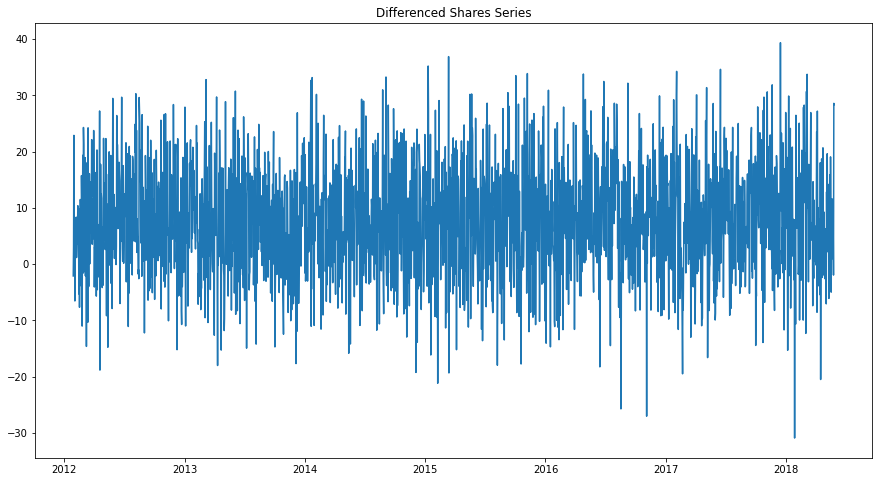

In [169]:
#drift
shares_drift_diff = shares_series_diff.diff(periods = 1)

fig = plt.figure(figsize = (15, 8))
plt.plot(shares_drift_diff)
plt.title('Differenced Shares Series')
plt.show()

###### ARMA Model 

In [170]:
stocks_news.head()

Time  Price    Bid    Ask  Size
Date                                           
2012-01-30  09:08:30  61.00  60.16  60.61  2119
2012-01-30  09:30:00  60.37  60.37  60.45   159
2012-01-30  09:30:00  60.38  60.38  60.43   100
2012-01-30  09:30:06  60.36  60.31  60.42   400
2012-01-30  09:30:17  60.30  60.29  60.39   150

In [171]:
data_diff.head()

Date
2012-01-30   -0.010382
2012-01-30    0.000166
2012-01-30   -0.000331
2012-01-30   -0.000995
2012-01-30   -0.000498
Name: Price, dtype: float64

In [172]:
# stocks_news2 = stocks_news.copy()

In [ ]:
# #plotting the ACF
from statsmodels.graphics.tsaplots import plot_acf
fig, ax = plt.subplots(figsize = (8, 3))

plot_acf(data_diff, ax = ax, lags = 8)

In [174]:
# #plotting PACF
# from statsmodels.graphics.tsaplots import plot_pacf
# fig, ax = plt.subplots(figsize= (8, 3))
# plot_pacf(data_diff, ax = ax, lags = 8);

In [ ]:
# #import arma
# from statsmodels.tsa.arima_model import ARMA

# #fit an ARMA model
# mod_arma = ARMA(data_diff, order = (HOW DO I SELECT ORDER? CLASS HAS (1,0))
# res_arma = mod_arma.fit()

# print(res_arma.summary())

After figuring out ARMA model then try diff orders to select the best. Select it based on AIC or. BIC as model selection criterion.

#### ARIMA Model

q - auto regressive part of the model. effect of past values into model. 
d - amount of differnecing as it identifies the number of lag values to subtract from the current observation
q - moving average part of the model which is used to set the error of the model as a linear combination of the error values observed at previous time points in the past.

In [ ]:
stocks_news2 = stocks_news.copy()
stocks_news2.head()

In [ ]:
# The 'MS' string groups the data in buckets by start of the month
stocks_news2 = stocks_news2['Price'].resample('MS').mean()

# The term bfill means that we use the value before filling in missing values
stocks_news2 = stocks_news2.fillna(stocks_news2.bfill())

# Plot the time series
stocks_news2.plot(figsize=(15, 6))
plt.show()
print(stocks_news2.head())

In [ ]:
import itertools

In [ ]:
#define p,d,q with value between 0 & 2
p = d = q = range(0, 2)

#generate diff combos of p, q, & d triplets
pdq = list(itertools.product(p, d, q))

#generate all diff combos of seasonal p, d, q, triplets
pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

Try to find the model with the lowest AIC score

In [ ]:
#initialize empty list
answer = []

#iterate through params
for comb in pdq:
  for combs in pdqs:
    try:
      mod = sm.tsa.statespace.ARIMAX(stocks_news2,
                                      order = comb,
                                      seasonal_order = combs,
                                      enforce_stationarity = False,
                                      enforce_invertibility = False)
      
      output = mod.fit()
      answer.append([comb, combs, output.aic])
      print('ARIMA{} x{}12: AIC Calculated = {}'.format(comb, combs, output.aic))
    except:
      continue

In [104]:
# Find the parameters with minimal AIC value
ans_df = pd.DataFrame(answer, columns=['pdq', 'pdqs', 'aic'])
ans_df.loc[ans_df['aic'].idxmin()]

TypeError: ignored

#Interpret

#Summary

#Future Work